In [18]:
!pip install keras

In [19]:
!pip install tensorflow

In [20]:
!pip install matplotlib

In [24]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Dense, Flatten

In [25]:
X_train = np.loadtxt('C:\dataset\imageclassification\input.csv',delimiter= ',')
Y_train = np.loadtxt('C:\dataset\imageclassification\labels.csv',delimiter= ',')
X_test = np.loadtxt('C:\dataset\imageclassification\input_test.csv',delimiter= ',')
Y_test = np.loadtxt('C:\dataset\imageclassification\labels_test.csv',delimiter= ',')

In [26]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)
X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [32]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


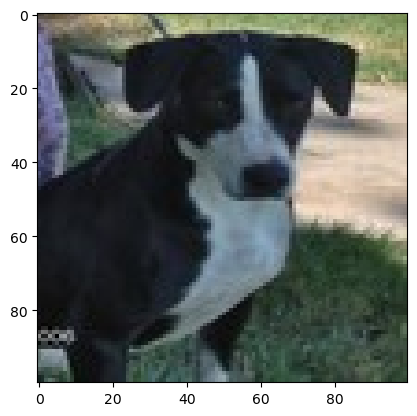

In [33]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [37]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3), activation = 'relu'), 
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation= 'relu'),
    Dense(1, activation = 'sigmoid')

    
])

In [39]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [42]:
model.fit(X_train, Y_train, epochs = 5, batch_size =64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8216 - loss: 0.3931
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8768 - loss: 0.2923
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9061 - loss: 0.2351
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.9316 - loss: 0.1975
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.9621 - loss: 0.1114


In [44]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6689 - loss: 1.1759


[1.028174638748169, 0.6924999952316284]

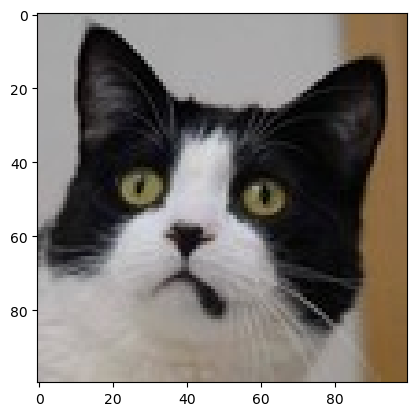

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Our model says it is a : cat


In [53]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred ==0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)